## Análise dos dados de voo de um foguete

In [110]:
# Desafio da Equipe de Propulsão e Tecnologia Aeroespacial - EPTA
# Aviônica
# Bruna Isabela de Oliveira
# Engenharia de Computação

In [111]:
# Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt

In [112]:
# Carregando o conjunto de dados

df = pd.read_excel("C:/Users/bruna/Documents/Estudo/UFU/EPTA/desafio/dados_foguete.xlsx", skiprows = 6)

In [113]:
# Análise da parte de cima da tabela

df.head(3)

,Longitude,Latitude,Altitude (m),counter:#sat:time (s),East (ft),North (ft),Altitude (ft),Altitude (ft).1,Time (s),Offset Time (s),Verticle Velocity (fps),Verticle Velocity (mph),Ground Distance Traveled,Ground velocity (mph),Accelleration (g's)
0,-120.068167,36.512440,53,!-- 38490 sats:11 UTC 17:44:36 -->,0.0,0.000000,173.88452,2.88452,1,-18,NaN,NaN,NaN,NaN,NaN
1,-120.068167,36.512442,54,!-- 38505 sats:11 UTC 17:44:37 -->,0.0,0.729062,177.16536,6.16536,2,-17,3.28084,2.236089,0.729062,NaN,NaN
2,-120.068167,36.512443,54,!-- 38520 sats:11 UTC 17:44:38 -->,0.0,1.093594,177.16536,6.16536,3,-16,0.00000,0.000000,1.093594,NaN,NaN


In [114]:
# Análise do final da tabela

df.tail(3)

,Longitude,Latitude,Altitude (m),counter:#sat:time (s),East (ft),North (ft),Altitude (ft),Altitude (ft).1,Time (s),Offset Time (s),Verticle Velocity (fps),Verticle Velocity (mph),Ground Distance Traveled,Ground velocity (mph),Accelleration (g's)
263,-120.076213,36.509537,51,!-- 42435 sats:11 UTC 17:48:59 -->,-2357.43718,-1058.234074,167.32284,-3.67716,264,245,0.00000,0.000000,7632.830302,0.0,0.000000
264,-120.076213,36.509537,51,!-- 42450 sats:11 UTC 17:49:00 -->,-2357.43718,-1058.234074,167.32284,-3.67716,265,246,0.00000,0.000000,7632.830302,0.0,0.000000
265,-120.076213,36.509537,50,!-- 42465 sats:11 UTC 17:49:01 -->,-2357.43718,-1058.234074,164.04200,-6.95800,266,247,-3.28084,-2.236089,7632.830302,0.0,-0.102526


## Características gerais do voo
Nesta seção será apresentado alguns dados gerais do voo, tais como o tempo do mesmo e a altitude inicial (antes do lançamento).

In [115]:
# Definindo as variáveis de tempo de lançamento

tempo_voo = df["Time (s)"].max()

In [116]:
# Definindo as variáveis de altitude inicial 

deslocamento1 = df.iloc[0,7]
altitude1 = df.iloc[0,6]
altitude_inicial_ft = altitude1 - deslocamento1


In [117]:
print()
print()
print("Tempo de voo do foguete =", tempo_voo, "s")
print("                        ≅", "%.2f" % (tempo_voo / 60), "min")
print()
print("Altitude inicial =", altitude_inicial_ft, "ft")
print("                 ≅", "%.2f" % (altitude_inicial_ft * 0.3048), "m")
print()



Tempo de voo do foguete = 266 s
                        ≅ 4.43 min

Altitude inicial = 171.0 ft
                 ≅ 52.12 m



## Trajetória no eixo Y
Análise sobre os valores da trajetória do foguete no eixo Y.

In [118]:
# Definindo as variáveis de tempo, apogeu e o momento que foi atingido

tempo = df["Time (s)"]

apogeu = df["Altitude (ft).1"].max()
df_apogeu = df.loc[df["Altitude (ft).1"] == apogeu]
t_apogeu = df_apogeu["Time (s)"].max()


In [119]:
# Definindo as variáveis de velocidade (eixo Y) e altitude.

altitude = df["Altitude (ft).1"]
vely = df["Verticle Velocity (fps)"]
vely_apogeu = vely[:47]


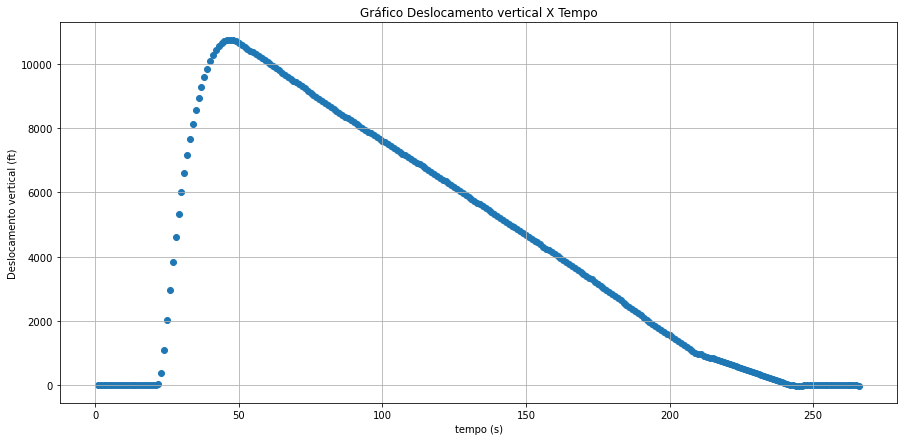



Apogeu = 10750.92 ft
        ≅ 3276.88 m

Momento do apogeu = 47 s

Velocidade média = 233.65 fps
 (até o apogeu)  ≅ 159.30 mph
                 ≅ 71.22 m/s

Velocidade mediana = 49.21 fps
 (até o apogeu)    ≅ 33.55 mph
                   ≅ 15.00 m/s



In [120]:
# Plotando gráficos de deslocamento na vertical em relação ao tempo.

plt.figure(figsize = (15,7))
plt.title("Gráfico Deslocamento vertical X Tempo")
plt.scatter(tempo, altitude)
plt.xlabel("tempo (s)")
plt.ylabel("Deslocamento vertical (ft)")
plt.grid()
plt.show()


# Printando resultados obtidos

print()
print()
print("Apogeu =", "%.2f" % apogeu, "ft")
print("        ≅", "%.2f" % (apogeu * 0.3048), "m")
print()
print("Momento do apogeu =", t_apogeu, "s")
print()
print("Velocidade média =", "%.2f" % vely_apogeu.mean(), "fps")
print(" (até o apogeu)  ≅", "%.2f" % (vely_apogeu.mean() * 0.6818), "mph")
print("                 ≅", "%.2f" % (vely_apogeu.mean() * 0.3048), "m/s")
print()
print("Velocidade mediana =", "%.2f" % vely_apogeu.median(), "fps")
print(" (até o apogeu)    ≅", "%.2f" % (vely_apogeu.median() * 0.6818), "mph")
print("                   ≅", "%.2f" % (vely_apogeu.median() * 0.3048), "m/s")
print()

## Tragetória no eixo X
Análise sobre os valores da trajetória do foguete no eixo X.

In [121]:
# Definindo as variáveis de velocidade (eixo X) e alcance.

velx = df["Ground velocity (mph)"]
velx_apogeu = vely[:47]
alcance = df["Ground Distance Traveled"].max()
dist = df["Ground Distance Traveled"]

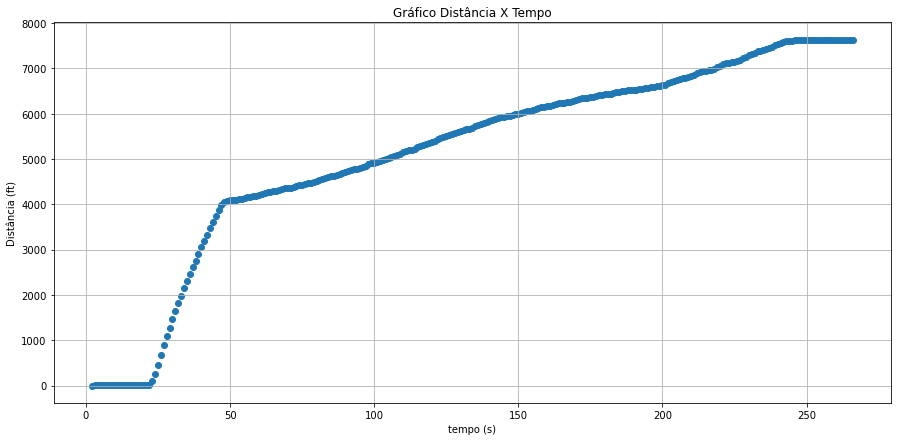



Distância percorrida = 7632.83 ft
                     ≅ 2326.49 m

Velocidade média = 233.65 mph
 (até o apogeu)  ≅ 104.45 m/s

Velocidade mediana = 49.21 mph
 (até o apogeu)    ≅ 22.00 m/s



In [122]:
# Plotando gráficos de distância em relação ao tempo.

plt.figure(figsize = (15,7))
plt.title("Gráfico Distância X Tempo")
plt.scatter(tempo, dist)
plt.xlabel("tempo (s)")
plt.ylabel("Distância (ft)")
plt.grid()
plt.show()


# Printando resultados obtidos

print()
print()
print("Distância percorrida =", "%.2f" % alcance, "ft")
print("                     ≅", "%.2f" % (alcance * 0.3048), "m")
print()
print("Velocidade média =", "%.2f" % velx_apogeu.mean(), "mph")
print(" (até o apogeu)  ≅", "%.2f" % (velx_apogeu.mean() * 0.44704), "m/s")
print()
print("Velocidade mediana =", "%.2f" % velx_apogeu.median(), "mph")
print(" (até o apogeu)    ≅", "%.2f" % (velx_apogeu.median() * 0.44704), "m/s")
print()

# Aceleração
Análise sobre os valores da aceleração do foguete até o momento do apogeu.

In [123]:
# Definindo as variáveis de aceleração e tempo.

acel_g = df["Accelleration (g's)"]
acel_apogeu = acel_g.loc[:47]
tempo_apogeu = tempo.loc[:47]


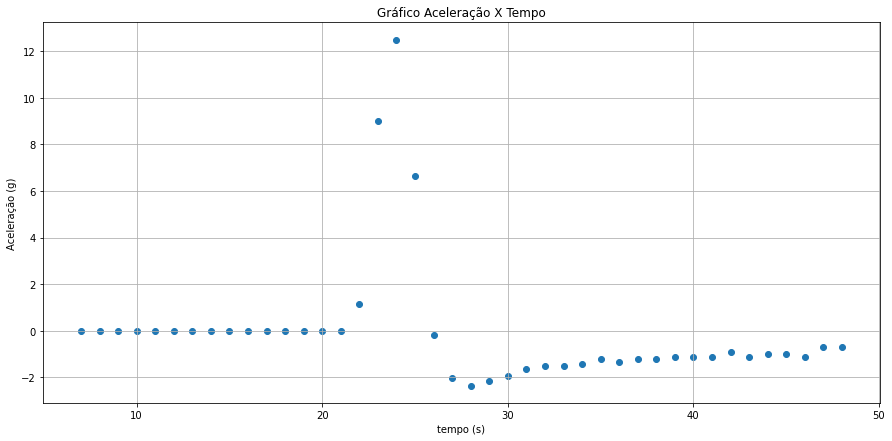



Aceleração máxima = 12.51 g
                  ≅ 122.66 m/s²

Aceleração média  = -0.01 g
                  ≅ -0.14 m/s²

Aceleração mediana = -0.72 g
                   ≅ -7.04 m/s²



In [124]:
# Plotando gráficos de aceleração em relação ao tempo

plt.figure(figsize = (15,7))
plt.title("Gráfico Aceleração X Tempo")
plt.scatter(tempo_apogeu, acel_apogeu)
plt.xlabel("tempo (s)")
plt.ylabel("Aceleração (g)")
plt.grid()
plt.show()


# Printando resultados obtidos

print()
print()
print("Aceleração máxima =", "%.2f" % acel_apogeu.max(), "g")
print("                  ≅", "%.2f" % (acel_apogeu.max() * 9.8066), "m/s²")    
print()
print("Aceleração média  =", "%.2f" % acel_apogeu.mean(), "g")
print("                  ≅", "%.2f" % (acel_apogeu.mean() * 9.8066), "m/s²")    
print()
print("Aceleração mediana =", "%.2f" % acel_apogeu.median(), "g")
print("                   ≅", "%.2f" % (acel_apogeu.median() * 9.8066), "m/s²")    
print()